### 행렬의 곱

In [1]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
# c = np.sum(a*b)
c = np.dot(a,b)  # (3,)(3,)=>()
print(c)

32


In [2]:
import numpy as np

a = np.array([[1,2,3]]) # (1,3)
print(a.shape)
b = np.array([[2],[2],[2]]) # (3,1)
print(b.shape)
c = np.dot(a,b)    # (1,3)(3,1)=>(1,1)
print(c.shape)   
print(c.ndim)
print(c)

(1, 3)
(3, 1)
(1, 1)
2
[[12]]


In [3]:
import numpy as np

a = np.array([[1,2,3],
              [4,5,6]]) # (2,3)
print(a.shape)
b = np.array([[2],[2],[2]]) # (3,1)
print(b.shape)
c = np.dot(a,b)    # (2,3)(3,1)
print(c.shape)   
print(c.ndim)
print(c)

(2, 3)
(3, 1)
(2, 1)
2
[[12]
 [30]]


In [4]:
import numpy as np

a = np.array([[1,2,3],
              [4,5,6]]) # (2,3)
print(a.shape)
b = np.array([[1,2],
              [1,2],
              [1,2]]) # (3,2)
print(b.shape)
c = np.dot(a,b)    # (2,3)(3,2)
print(c.shape)   
print(c.ndim)
print(c)

(2, 3)
(3, 2)
(2, 2)
2
[[ 6 12]
 [15 30]]


### 배열의 복사( 얕은복사, 깊은복사)

In [5]:
a = np.array([1,2,3,4,5])
b = a
b[0] = 10
a

array([10,  2,  3,  4,  5])

In [6]:
a = np.array([1,2,3,4,5])
b = a.copy()
b[0] = 10
print(a)
print(b)

[1 2 3 4 5]
[10  2  3  4  5]


### 행렬의 전치

In [7]:
a = np.array([1,2,3])  # 일차원 배열은 전치가 없다. 왜? 전치는 축교환을 의미하기 때문
print(a.shape)         # (3,)
print(a.T)
print(a.T.shape)       # (3,)

(3,)
[1 2 3]
(3,)


In [8]:
a = np.array([1,2,3,4])
print(a)
print(a.shape)
# b = np.reshape(a, (3,1))
b = np.reshape(a, (-1,1))
print(b)
print(b.shape)

[1 2 3 4]
(4,)
[[1]
 [2]
 [3]
 [4]]
(4, 1)


In [9]:
a = np.array([[1,2,3],
              [1,2,3]])
print(a)
print(a.shape)        # (2, 3)
print(a.T.shape)      # (3, 2)
print(a.T)
b = np.transpose( a, (1,0))
print(b)

[[1 2 3]
 [1 2 3]]
(2, 3)
(3, 2)
[[1 1]
 [2 2]
 [3 3]]
[[1 1]
 [2 2]
 [3 3]]


In [10]:
a = np.array([[1,2],
              [1,2]])
print(a)
print(a.shape)        # (2, 2)
print(a.T.shape)      # (2, 2)
print(a.T)
b = np.transpose( a, (1,0))
print(b)

[[1 2]
 [1 2]]
(2, 2)
(2, 2)
[[1 1]
 [2 2]]
[[1 1]
 [2 2]]


### 행렬곱의 교환 법칙

In [11]:
import numpy as np

a = np.array([[1,2,3]]) # (1,3)
b = np.array([[2],[2],[2]]) # (3,1)

c = np.dot(a,b)   # (1,3)(3,1) => (1,1)
print(c.shape)  
print(c)

c = np.dot(b,a)  # (3,1)(1,3) => (3,3)
print(c.shape)  
print(c)              

(1, 1)
[[12]]
(3, 3)
[[2 4 6]
 [2 4 6]
 [2 4 6]]


In [12]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]]) # (2,3)
b = np.array([[2],[2],[2]]) # (3,1)

c = np.dot(a,b)   # (2,3)(3,1) => (2,1)
print(c.shape)  
print(c)

# c = np.dot(b,a)  # (3,1)(2,3) 
# print(c.shape)  

(2, 1)
[[12]
 [30]]


딥 카피 예

In [13]:
a = np.array([1,2,3,4,5])
b = a
print(a)
print(b)
b[0] *= 10
print(a)
print(b)

[1 2 3 4 5]
[1 2 3 4 5]
[10  2  3  4  5]
[10  2  3  4  5]


In [14]:
a = np.array([1,2,3,4,5])
b = a.copy()
print(a)
print(b)
b[0] *= 10
print(a)
print(b)

[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]
[10  2  3  4  5]


###  배치 경사 하강 구현

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [16]:
print("x_train.shape=", x_train.shape)
print("y_train.shape=", y_train.shape)

x_train.shape= (364, 30)
y_train.shape= (364,)


In [17]:
class SingleLayer:    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다. (364,30)(30,1)=>(364,1)+(364,1)
        return z

    def backprop(self, x, err):              #  x.shape => (364,30) , err => (364,1)
        m = len(x)                           # (30,364)(364,1)=>(30,1)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad                 # b 스칼라 => b_grad 스칼라

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):  # x.shape => (364,30)
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.  y.shape (364,) => y.reshape(-1,1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다. w.shape => (30,1)
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
#             print(x.shape)
            z = self.forpass(x)               # 정방향 계산을 수행합니다.  x.shape => (364,30)
#             print(z.shape)
            a = self.activation(z)            # 활성화 함수를 적용합니다.  a.shape => (364,1)
#             print(a.shape)
            err = a - y                   # 오차를 계산합니다.   y.shape => (364,1)
#             print(err.shape)
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)  #  x.shape => (364,30) , err => (364,1)
#             print(w_grad.shape)
#             print(b_grad.shape)
            # 그래디언트에서 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
#             break
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [19]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, 
                 x_val=x_val_scaled, y_val=y_val, epochs=1000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

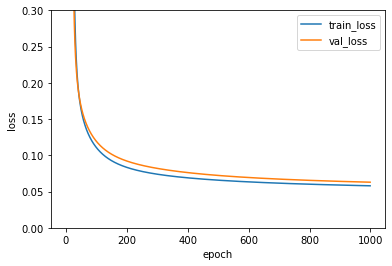

In [20]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

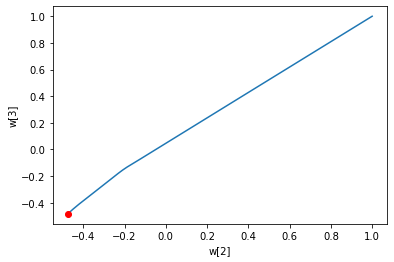

In [21]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [35]:
import numpy as np
b2 = 4
temp = np.array([[1],
                 [2],
                 [3]])
print(temp.shape)
z2 = temp + b2 # (3,1) + () => (3,1) + (3,1) 
print(z2.shape)
print(z2)
np.sum(z2)

(3, 1)
(3, 1)
[[5]
 [6]
 [7]]


18

In [43]:
import numpy as np
b2 = 4
err = np.array([[1],
                [2],
                [3]])    # (3,1)

print(np.sum(err))
print(np.sum(err, axis=0))
print(err.shape)
b2_grad = np.sum(err)/3
print(b2_grad)  # 2
b2 = b2 - 0.01*b2_grad
print(b2.shape)
print(b2)

6
[6]
(3, 1)
2.0
()
3.98


In [44]:
b2 = np.array([4])
temp = np.array([[1],
                 [2],
                 [3]])
z2 = temp + b2 # (3,1) + (1,) => (3,1) + (3,1) 
print(z2.shape)
print(z2)

(3, 1)
[[5]
 [6]
 [7]]


In [47]:
import numpy as np
b2 = np.array([4])
err = np.array([[1],
                [2],
                [3]])

print(err.shape)
# np.sum(err, axis=0).shape
b2_grad = np.sum(err, axis=0)/3
print(b2_grad.shape)  # (1,)
print(b2_grad)
b2 = b2 - 0.01*b2_grad
print(b2.shape)
print(b2)

(3, 1)
(1,)
[2.]
(1,)
[3.98]


### 기본 딥러닝 구현(2층 구조)

In [23]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = (a - y)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [24]:
dual_layer = DualLayer(units=20, l2=0.01)
dual_layer.fit(x_train_scaled, y_train, 
               x_val=x_val_scaled, y_val=y_val, epochs=12000)
dual_layer.score(x_val_scaled, y_val)

0.967032967032967

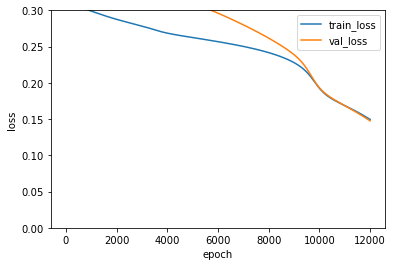

In [25]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [27]:
a = np.random.normal(0, 1,  (200,300))
# print(a)
print(np.mean(a))
print(np.std(a))

0.0020211810916944102
1.0004651229305432


In [29]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

In [30]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val=x_val_scaled, y_val=y_val, epochs=2000)

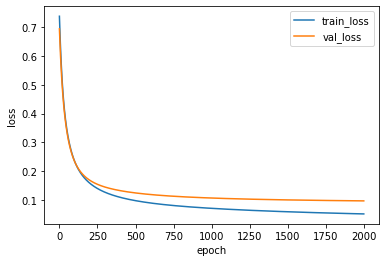

In [31]:
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### 파이썬의 제너레이터 함수

In [50]:
def foo():
    ret = 10   # 스택
    print('foo()')
    return ret
    print('after')
    
c = foo()
print(c)
# print(ret)

foo()
10


In [55]:
def foo():
    print('foo()')
    yield 10
    print('after')
    yield 20

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x0000025326ED2B30>
foo()
10
after
20


In [59]:
def foo():
    print('foo()')
    yield 10
    yield 20

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x0000025326ED2BA0>
foo()
10
20


StopIteration: 

In [60]:
def foo():
    print('foo()')
    yield 10
    yield 20

for n in foo():
    print(n)

foo()
10
20


In [63]:
def foo():
    print('foo()')
    a = np.arange(100)
    print(a.shape)
    return a[0:10]

c = foo()
print(c.shape)
print(c)
c = foo()
print(c.shape)
print(c)

foo()
(100,)
(10,)
[0 1 2 3 4 5 6 7 8 9]
foo()
(100,)
(10,)
[0 1 2 3 4 5 6 7 8 9]


In [64]:
a = np.arange(7)
b = a[0:10]
print(b)

[0 1 2 3 4 5 6]


In [69]:
def foo():
    print('foo()')
    a = np.arange(100,205)
    batch = 32
    length = len(a)
    bins = length // batch
    if length % batch != 0 :
        bins += 1
    for i in range(bins):
        start = batch*i
        end = batch*(i+1)
        yield a[start:end]

# c = foo()
# n = next(c)
# print(n)
# n = next(c)
# print(n)
for n in foo():
    print(n)

foo()
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131]
[132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163]
[164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195]
[196 197 198 199 200 201 202 203 204]


In [70]:
def foo():
    print('foo()')
    for i in range(10):
        yield  (i+1)*10
    
for ret in foo():
    print(ret)

foo()
10
20
30
40
50
60
70
80
90
100


In [71]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
print(a[8:12])

[ 9 10]


### 미니 배치 학습의 구현

In [72]:
class MinibatchNetwork(RandomInitNetwork):
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        super().__init__(units, learning_rate, l1, l2)
        self.batch_size = batch_size     # 배치 크기
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y_val = y_val.reshape(-1, 1)     # 타깃을 열 벡터로 바꿉니다.
        self.init_weights(x.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        np.random.seed(42)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                m = len(x_batch)                 # 샘플 개수를 저장합니다.
                a = self.training(x_batch, y_batch, m)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

In [75]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

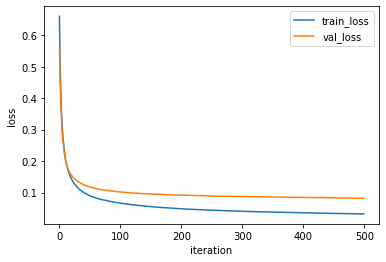

In [76]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### softmax 계산 예제

In [81]:
import numpy as np
temp = np.array([2.20,1.39,0.85])

print(temp)
exp_temp = np.exp(temp)
print(exp_temp)
print(np.sum(exp_temp))
ret = exp_temp / np.sum(exp_temp)
print( ret )
ret = temp / np.sum(temp)
print( ret )

[2.2  1.39 0.85]
[9.0250135  4.01485005 2.33964685]
15.379510404354313
[0.5868206  0.26105188 0.15212752]
[0.4954955  0.31306306 0.19144144]


In [85]:
import numpy as np
temp = np.array([[2.20,1.39,0.85],
                 [0.00,-1.39,-2.20]])
exp_temp = np.exp(temp)
print(exp_temp)
print(np.sum(exp_temp, axis=1))
print(np.sum(exp_temp, axis=1).reshape(-1, 1))
ret = exp_temp / np.sum(exp_temp, axis=1).reshape(-1, 1)
print( ret )

[[9.0250135  4.01485005 2.33964685]
 [1.         0.2490753  0.11080316]]
[15.3795104   1.35987846]
[[15.3795104 ]
 [ 1.35987846]]
[[0.5868206  0.26105188 0.15212752]
 [0.73535983 0.18315997 0.08148019]]


In [ ]:
def softmax(z):
    # 소프트맥스 함수
    z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)

In [ ]:
temp = np.array([[2.20,1.39,0.85],
                 [0.00,-1.39,-2.20]])
a = softmax(temp)
print(a)
print(np.sum(a, axis=1))